In [57]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import seaborn as sns
import statsmodels.api as sm
import matplotlib

#matplotlib.rcParams['axes.labelsize'] = 14
#matplotlib.rcParams['xtick.labelsize'] = 12
#matplotlib.rcParams['ytick.labelsize'] = 12
#matplotlib.rcParams['text.color'] = 'k'

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading datasets
customers = pd.read_excel("Customers.xlsx")

df1 = pd.read_excel("2020 Total.xlsx")
df2 = pd.read_excel("2021 Total.xlsx")
df3 = pd.read_excel("2022 Total.xlsx")

In [3]:
#Merging sales datasets
sales = pd.concat([df1, df2, df3])

### Analysis of Customers Dataset

In [4]:
#Observing the customes dataset
customers.head(10)

,NO,OUTLET ID,ZONE,REGION,TERRITORY,ROUTE NAME,CATEGORY,CUSTOMER SPECIFICATION,OWNER NAME,ADDRESS,CONTACT PERSON,CODE,OUTLET STATUS
0,9716,5756,RL,ASM - SANJAYA,A.R.G DISTRIBUTORS(PVT)LTD.,DIGANA,Paint Center,NaN,A.M.J.K.ABESINGHA,NO.119/3 KANDY ROAD DIGANA,MR. JAYANTHA,5756,Active
1,9717,10406,RL,ASM - SANJAYA,A.R.G DISTRIBUTORS(PVT)LTD.,DIGANA,Hardware,NaN,MR. GAYAN,"NO:04,NEW TOWN ,DIGANA, RAJAWELLA",MR. GAYAN,10406,Active
2,9718,8672,RL,ASM - SANJAYA,A.R.G DISTRIBUTORS(PVT)LTD.,DIGANA,Hardware,NaN,MR. BAVITHRAN,"NO:6,NEW TOWN,DIGANA",MR. BAVITHRAN,8672,Active
3,9719,3198,RL,ASM - SANJAYA,A.R.G DISTRIBUTORS(PVT)LTD.,DIGANA,Hardware,NaN,A.P.PADHMANADHAN,"NO. 24, NEW TOWN, DIGANA, RAJAWELLA.",MR. KETHERSHAN,3198,Active
4,9720,13818,RL,ASM - SANJAYA,A.R.G DISTRIBUTORS(PVT)LTD.,DIGANA,Hardware,NaN,GAYAN SURANGA WANASINGHA,"NO:28,NEW TOWN DIGANA,RAJAWELLA",MR. GAYAN,13818,Active
5,9721,10477,RL,ASM - SANJAYA,A.R.G DISTRIBUTORS(PVT)LTD.,DIGANA,Colour Center,NaN,K .G .H .M SIMSAN,"66,NEW TOWN,DIGANA,RAJAWELLA",SIMSAN,10477,Active
6,9722,6479,RL,ASM - SANJAYA,A.R.G DISTRIBUTORS(PVT)LTD.,DIGANA,Furniture,NaN,N.P.M RAFIC,"905/7,NEW TOWN ,RAJAWALLA ROAD,DIGANA",MR. RAFIC,6479,Active
7,9723,3195,RL,ASM - SANJAYA,A.R.G DISTRIBUTORS(PVT)LTD.,DIGANA,Colour Center,NaN,R. AMBALAGAN,"NO.73, NEW TOWN, DIGNA-RAJAWELLA",MR.PEMARATHNA,3195,Active
8,9724,3143,RL,ASM - SANJAYA,A.R.G DISTRIBUTORS(PVT)LTD.,DIGANA,Furniture,NaN,MR. ARAVINDA,"VICTORIYA GARDEN RD, DIGANA, RAJAWELLA.",MR. ROSHAN,3143,Active
9,9725,5573,RL,ASM - SANJAYA,A.R.G DISTRIBUTORS(PVT)LTD.,DIGANA,Industry,NaN,MR. DAMMIKA,"VICTORIA GOLF CLUB ROAD,DIGANA",MS. RUPA,5573,Active


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9715 entries, 0 to 9714
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NO                      9715 non-null   int64 
 1   OUTLET ID               9715 non-null   int64 
 2   ZONE                    9715 non-null   object
 3   REGION                  9715 non-null   object
 4   TERRITORY               9715 non-null   object
 5   ROUTE NAME              9715 non-null   object
 6   CATEGORY                9707 non-null   object
 7   CUSTOMER SPECIFICATION  3420 non-null   object
 8   OWNER NAME              7828 non-null   object
 9   ADDRESS                 9711 non-null   object
 10  CONTACT PERSON          6094 non-null   object
 11  CODE                    9715 non-null   int64 
 12  OUTLET STATUS           9715 non-null   object
dtypes: int64(3), object(10)
memory usage: 986.8+ KB


In [6]:
#Checking for null values
customers.isnull().sum()

NO                           0
OUTLET ID                    0
ZONE                         0
REGION                       0
TERRITORY                    0
ROUTE NAME                   0
CATEGORY                     8
CUSTOMER SPECIFICATION    6295
OWNER NAME                1887
ADDRESS                      4
CONTACT PERSON            3621
CODE                         0
OUTLET STATUS                0
dtype: int64

In [7]:
customers['CUSTOMER SPECIFICATION'].fillna("Other", inplace = True)

In [8]:
#Getting summary statistics for categorical variables
cat = customers.dtypes[customers.dtypes == "object"].index
print(cat)

customers[cat].describe()

Index(['ZONE', 'REGION', 'TERRITORY', 'ROUTE NAME', 'CATEGORY',
       'CUSTOMER SPECIFICATION', 'OWNER NAME', 'ADDRESS', 'CONTACT PERSON',
       'OUTLET STATUS'],
      dtype='object')


,ZONE,REGION,TERRITORY,ROUTE NAME,CATEGORY,CUSTOMER SPECIFICATION,OWNER NAME,ADDRESS,CONTACT PERSON,OUTLET STATUS
count,9715,9715,9715,9715,9707,9715,7828,9711,6094,9715
unique,4,12,32,529,29,4,7054,9025,4655,2
top,RL,ASM - PRASAD,INRO TRADERS AND DISTRIBUTORS (PVT) LTD.,BLACK LIST,Hardware,Other,MR.,COLOMBO,OWNER,Active
freq,4355,1498,809,506,6384,6295,19,17,79,8757


In [9]:
outlet_status = pd.Categorical(customers['OUTLET STATUS'], ordered = True)
outlet_status.describe()

,counts,freqs
categories,,
Active,8757,0.90139
Inactive,958,0.09861


In [10]:
100*customers['OUTLET STATUS'].value_counts(normalize=True)

Active      90.13896
Inactive     9.86104
Name: OUTLET STATUS, dtype: float64

In [11]:
category = pd.Categorical(customers['CATEGORY'], ordered = True)
category.describe()

,counts,freqs
categories,,
ALUMINUM SHOP,1,0.000103
Center,333,0.034277
Colour Center,138,0.014205
Construction,456,0.046938
ELECTRICAL SHOP,4,0.000412
Enterprise,150,0.015440
Fiber Glass,15,0.001544
Furniture,486,0.050026
GLASS CENTER,39,0.004014


In [12]:
100*customers['CATEGORY'].value_counts(normalize=True)

Hardware                 65.766972
Industry                  5.058205
Furniture                 5.006696
Construction              4.697641
Center                    3.430514
Paint Center              3.379005
Other                     2.987535
Enterprise                1.545277
Colour Center             1.421654
Stores                    1.040486
Trade Center              0.988977
INDUSTRIAL                0.669620
Trader                    0.649016
Hotel                     0.638714
TIMBER                    0.545998
GLASS CENTER              0.401772
Interiors                 0.339961
SUPPLIER                  0.329659
PAINT                     0.278150
Picture Palace            0.247244
TIMBER DEPORT             0.206037
Fiber Glass               0.154528
MULTI SHOP                0.072113
GLASS HOUSE               0.051509
ELECTRICAL SHOP           0.041207
SAW MILLS & FURNITURE     0.020604
ALUMINUM SHOP             0.010302
IRON WORKS                0.010302
TILE SHOP           

In [13]:
cus_specification = pd.Categorical(customers["CUSTOMER SPECIFICATION"], ordered = True)
cus_specification.describe()

,counts,freqs
categories,,
A (1000),1267,0.130417
B (2000),761,0.078332
C (3500),1392,0.143284
Other,6295,0.647967


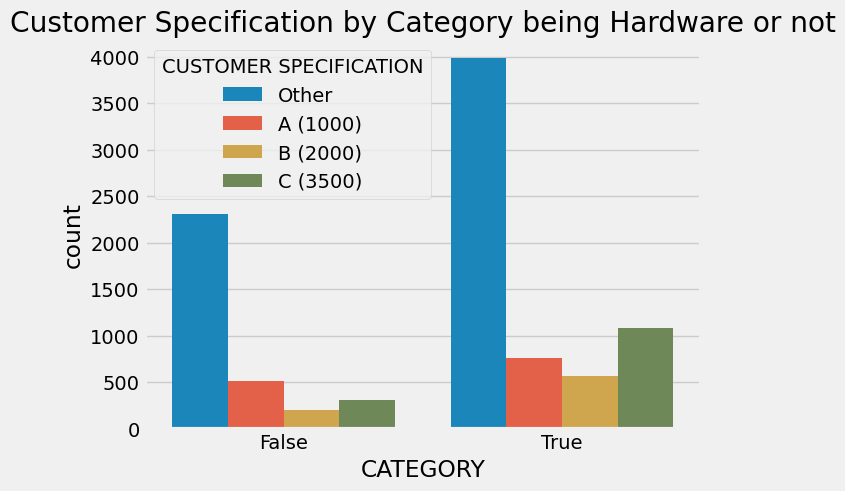

In [14]:
figsize = (15,10)
plot = sns.countplot((customers['CATEGORY'] == 'Hardware'), hue = customers['CUSTOMER SPECIFICATION'])

plt.title("Customer Specification by Category being Hardware or not")
plt.show()

In [15]:
hardware = customers[customers['CATEGORY'] == 'Hardware'].groupby(customers['CUSTOMER SPECIFICATION']).count()

hardware

,NO,OUTLET ID,ZONE,REGION,TERRITORY,ROUTE NAME,CATEGORY,CUSTOMER SPECIFICATION,OWNER NAME,ADDRESS,CONTACT PERSON,CODE,OUTLET STATUS
CUSTOMER SPECIFICATION,,,,,,,,,,,,,
A (1000),760,760,760,760,760,760,760,760,506,760,300,760,760
B (2000),561,561,561,561,561,561,561,561,512,561,412,561,561
C (3500),1080,1080,1080,1080,1080,1080,1080,1080,1030,1080,920,1080,1080
Other,3983,3983,3983,3983,3983,3983,3983,3983,2877,3982,2210,3983,3983


### Analysis of Sales Dataset

In [16]:
#Observing the sales dataset
sales.head(10)

,RSM,ASM,Distributor Name,Sales Rep,Route,Customer Code,Customer Name,Order Date,Order Time,Sales Type,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,RANGA,PRASAD RANAWAKA,DAVNIK DISTRIBUTOR 2,KAVINDA PRASHAD,AVISSAWELLA,621.0,WISHMA HARDWARE AVISSAWELLA,2020-01-01,11:39:57,Sales Order,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RANGA,PRASAD RANAWAKA,DAVNIK DISTRIBUTOR 2,KAVINDA PRASHAD,AVISSAWELLA,621.0,WISHMA HARDWARE AVISSAWELLA,2020-01-01,11:39:57,Sales Order,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RANGA,PRASAD RANAWAKA,DAVNIK DISTRIBUTOR 2,KAVINDA PRASHAD,AVISSAWELLA,621.0,WISHMA HARDWARE AVISSAWELLA,2020-01-01,11:39:57,Sales Order,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUDDHIKA CHATHURANGA,NADEERAKA LORENZUHEWA,M.K.B HARDWARE,Udayanga,KURUNEGALA,4455.0,NEW AJANTHA H/W,2020-01-01,12:07:45,Sales Order,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUDDHIKA CHATHURANGA,NADEERAKA LORENZUHEWA,M.K.B HARDWARE,Udayanga,PANNALA,6949.0,NADEEKA H/W,2020-01-01,12:50:01,Sales Order,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BUDDHIKA CHATHURANGA,NADEERAKA LORENZUHEWA,M.K.B HARDWARE,Udayanga,PANNALA,6949.0,NADEEKA H/W,2020-01-01,12:50:01,Sales Order,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BUDDHIKA CHATHURANGA,NADEERAKA LORENZUHEWA,M.K.B HARDWARE,Udayanga,PANNALA,7459.0,NETHSARA H/W,2020-01-01,12:51:40,Sales Order,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BUDDHIKA CHATHURANGA,NADEERAKA LORENZUHEWA,M.K.B HARDWARE,Udayanga,PANNALA,7459.0,NETHSARA H/W,2020-01-01,12:51:40,Sales Order,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,RANGA,SANJAYA GAYAN,SEWANA DISTRIBUTORS,Chinthana Wishwanath,BLACKLIST,5965.0,MULTY HW,2020-01-01,08:42:53,RD Free Invoicess,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,RANGA,SANJAYA GAYAN,SEWANA DISTRIBUTORS,Chinthana Wishwanath,BLACKLIST,5965.0,MULTY HW,2020-01-01,08:42:53,RD Free Invoicess,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
sales = sales.drop(sales.iloc[:,20:35], axis = 1)

In [18]:
sales.head(10)

,RSM,ASM,Distributor Name,Sales Rep,Route,Customer Code,Customer Name,Order Date,Order Time,Sales Type,Free issue,Product Code,Product Category,Sell Qty,Promotion,Sell Value,Invoicecd Date,Invoiced Time,Invoice Qty,Invoiced Value
0,RANGA,PRASAD RANAWAKA,DAVNIK DISTRIBUTOR 2,KAVINDA PRASHAD,AVISSAWELLA,621.0,WISHMA HARDWARE AVISSAWELLA,2020-01-01,11:39:57,Sales Order,No,AM0549/95-0.5,SAYERLACK WB,4,0.25,5144.0,2020-01-01,11:47:27,4.0,3858.00
1,RANGA,PRASAD RANAWAKA,DAVNIK DISTRIBUTOR 2,KAVINDA PRASHAD,AVISSAWELLA,621.0,WISHMA HARDWARE AVISSAWELLA,2020-01-01,11:39:57,Sales Order,No,AZ3230/85-2.5,SAYERLACK WB,1,0.25,9119.0,2020-01-01,11:47:27,1.0,6839.25
2,RANGA,PRASAD RANAWAKA,DAVNIK DISTRIBUTOR 2,KAVINDA PRASHAD,AVISSAWELLA,621.0,WISHMA HARDWARE AVISSAWELLA,2020-01-01,11:39:57,Sales Order,No,AZ3260/85-0.5,SAYERLACK WB,2,0.25,4516.0,2020-01-01,11:47:27,2.0,3387.00
3,BUDDHIKA CHATHURANGA,NADEERAKA LORENZUHEWA,M.K.B HARDWARE,Udayanga,KURUNEGALA,4455.0,NEW AJANTHA H/W,2020-01-01,12:07:45,Sales Order,No,AM0549/92-1,SAYERLACK WB,12,0.30,29868.0,2020-01-01,12:57:02,12.0,20907.60
4,BUDDHIKA CHATHURANGA,NADEERAKA LORENZUHEWA,M.K.B HARDWARE,Udayanga,PANNALA,6949.0,NADEEKA H/W,2020-01-01,12:50:01,Sales Order,No,CWFI01-10,CROWN WALL FILLER,12,0.30,33540.0,2020-01-01,13:00:35,12.0,23478.00
5,BUDDHIKA CHATHURANGA,NADEERAKA LORENZUHEWA,M.K.B HARDWARE,Udayanga,PANNALA,6949.0,NADEEKA H/W,2020-01-01,12:50:01,Sales Order,No,CWFI01-20,CROWN WALL FILLER,4,0.30,20640.0,2020-01-01,13:00:35,4.0,14448.00
6,BUDDHIKA CHATHURANGA,NADEERAKA LORENZUHEWA,M.K.B HARDWARE,Udayanga,PANNALA,7459.0,NETHSARA H/W,2020-01-01,12:51:40,Sales Order,No,BMB-2,HAND BRUSH,11,0.25,5225.0,2020-01-01,13:03:56,NaN,NaN
7,BUDDHIKA CHATHURANGA,NADEERAKA LORENZUHEWA,M.K.B HARDWARE,Udayanga,PANNALA,7459.0,NETHSARA H/W,2020-01-01,12:51:40,Sales Order,No,PSCI-20,JOINTC-SKIMC-PERMOGLAZE,12,0.25,10728.0,2020-01-01,13:03:56,12.0,8046.00
8,RANGA,SANJAYA GAYAN,SEWANA DISTRIBUTORS,Chinthana Wishwanath,BLACKLIST,5965.0,MULTY HW,2020-01-01,08:42:53,RD Free Invoicess,Yes,PV02-0.5,JCHEM VARNISH,1,1.00,0.0,2020-01-01,08:42:53,1.0,NaN
9,RANGA,SANJAYA GAYAN,SEWANA DISTRIBUTORS,Chinthana Wishwanath,BLACKLIST,5965.0,MULTY HW,2020-01-01,08:42:53,RD Free Invoicess,Yes,PV03-1,JCHEM VARNISH,1,1.00,0.0,2020-01-01,08:42:53,1.0,NaN


In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482563 entries, 0 to 398797
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   RSM               1482563 non-null  object        
 1   ASM               1482563 non-null  object        
 2   Distributor Name  1482563 non-null  object        
 3   Sales Rep         1482563 non-null  object        
 4   Route             1482563 non-null  object        
 5   Customer Code     1470248 non-null  float64       
 6   Customer Name     1482563 non-null  object        
 7   Order Date        1482563 non-null  datetime64[ns]
 8   Order Time        1482563 non-null  object        
 9   Sales Type        1482563 non-null  object        
 10  Free issue        1482563 non-null  object        
 11  Product Code      1482563 non-null  object        
 12  Product Category  1482563 non-null  object        
 13  Sell Qty          1482563 non-null  int64  

In [20]:
sales.describe()

,Customer Code,Sell Qty,Promotion,Sell Value,Invoice Qty,Invoiced Value
count,1.470248e+06,1.482563e+06,1.482563e+06,1.482563e+06,1.439014e+06,1.374872e+06
mean,6.342080e+03,6.389401e+00,3.321766e-01,1.566036e+04,6.323246e+00,1.177240e+04
std,4.304525e+03,2.488674e+01,2.132397e-01,3.714917e+04,2.513134e+01,2.655495e+04
min,2.300000e+01,-2.461700e+04,0.000000e+00,-2.960500e+06,-2.461700e+04,-1.974654e+06
25%,2.416000e+03,2.000000e+00,2.500000e-01,2.489000e+03,2.000000e+00,2.145000e+03
50%,5.711000e+03,4.000000e+00,3.000000e-01,7.416000e+03,4.000000e+00,5.600250e+03
75%,1.008700e+04,6.000000e+00,3.000000e-01,1.710000e+04,6.000000e+00,1.305000e+04
max,1.544100e+04,5.000000e+03,1.000000e+00,1.537584e+07,5.000000e+03,1.076309e+07


In [21]:
#Checking for null values
sales.isnull().sum()

RSM                      0
ASM                      0
Distributor Name         0
Sales Rep                0
Route                    0
Customer Code        12315
Customer Name            0
Order Date               0
Order Time               0
Sales Type               0
Free issue               0
Product Code             0
Product Category         0
Sell Qty                 0
Promotion                0
Sell Value               0
Invoicecd Date           0
Invoiced Time            0
Invoice Qty          43549
Invoiced Value      107691
dtype: int64

In [22]:
# Filling null values
sales["Invoice Qty"].fillna(0, inplace = True)
sales["Invoiced Value"].fillna(0, inplace = True)

<AxesSubplot:>

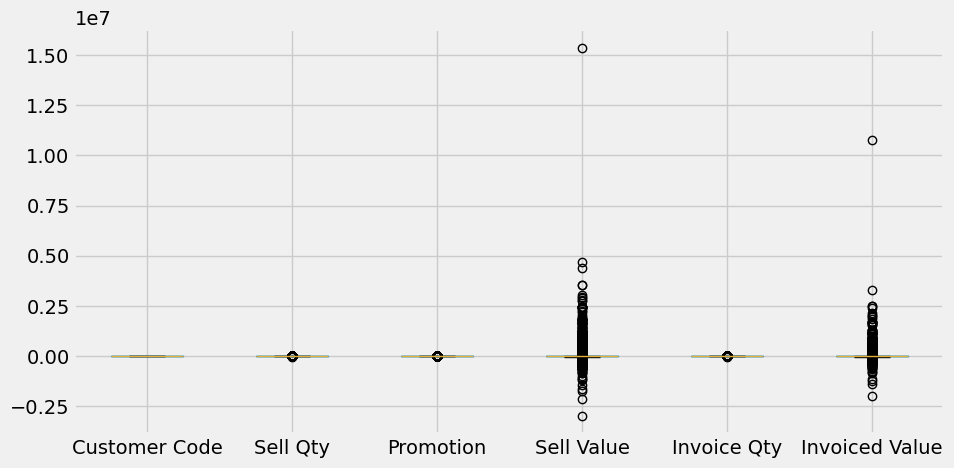

In [23]:
# Checking outliers
sales.boxplot(figsize = (10,5))

In [24]:
#Getting summary statistics for categorical variables
categorical = sales.dtypes[sales.dtypes == "object"].index
print(categorical)

sales[categorical].describe()

Index(['RSM', 'ASM', 'Distributor Name', 'Sales Rep', 'Route', 'Customer Name',
       'Order Time', 'Sales Type', 'Free issue', 'Product Code',
       'Product Category', 'Invoiced Time'],
      dtype='object')


,RSM,ASM,Distributor Name,Sales Rep,Route,Customer Name,Order Time,Sales Type,Free issue,Product Code,Product Category,Invoiced Time
count,1482563,1482563,1482563,1482563,1482563,1482563,1482563,1482563,1482563,1482563,1482563,1482563
unique,6,17,32,108,596,7675,76623,4,2,2063,81,75738
top,RANGA,SANJAYA GAYAN,LAKDAM TRADING COMPANY (PVT) LTD,Shehan Suraj,BLACK LIST,COLOUR SHOP,10:46:09,Sales Order,No,AM0549/89-1,SAYERLACK WB,10:46:09
freq,589779,204239,108542,69131,24510,8677,273,1324788,1354860,42345,560343,255


In [71]:
# Calculate total sales value by category
total_sales_by_category = sales.groupby('Product Category')['Invoiced Value'].sum()
print(total_sales_by_category)

Product Category
3MPRODUCT            6.633140e+04
ANTI BLUE            3.337558e+06
ANTI BORER           3.233539e+07
ATLAS SAND PAPERS    8.548126e+06
BLEACHING AGENT      1.763898e+07
                         ...     
WOOD PRESERVATIVE    2.635773e+08
WOOD PUTTY           7.471088e+08
WOOD STAIN           3.425270e+08
WOOD TREATMENT       1.706565e+05
Wood Putty           4.432974e+05
Name: Invoiced Value, Length: 81, dtype: float64


In [72]:
# Calculate total sales value by category
total_sales_by_category = sales.groupby('Product Category')['Invoiced Value'].sum()

# Format the values as numbers and convert to string
total_sales_by_category_str = total_sales_by_category.apply(lambda x: '{:,.2f}'.format(x)).to_string()

# Print the results
print(total_sales_by_category_str)

Product Category
3MPRODUCT                                 66,331.40
ANTI BLUE                              3,337,558.20
ANTI BORER                            32,335,392.30
ATLAS SAND PAPERS                      8,548,126.30
BLEACHING AGENT                       17,638,984.15
BORMA MAINTENANCE WACHES                  33,547.40
BORMA SPECIAL EFFECT RANGE                42,206.60
CEILING COAT-1                       123,402,574.10
CROWN SILK EMULSION                   24,375,858.25
CROWN WALL FILLER                     21,115,034.85
CROWN WATER BASED ROOFING PAINT          319,933.60
CROWN WEATHER COAT                    16,810,884.90
D2 SUPER BOND                            100,472.68
D3 HIGH BOND                              22,320.00
DECKING OIL                              105,286.00
EASY CUT                                  11,359.25
FUGIAN_GOLDEN_BAMBOO                       4,617.00
GLAZE                                    318,243.75
GLUE                                      89,58

In [73]:
# Extract the year from the 'Order Date' column and store it in a new column 'Year'
sales['Year'] = sales['Invoicecd Date'].dt.year

# Calculate total sales value by category and year
total_sales_by_category_year = sales.groupby(['Product Category', 'Year'])['Invoiced Value'].sum()

# Format the values as numbers and convert to string
total_sales_by_category_year_str = total_sales_by_category_year.apply(lambda x: '{:,.2f}'.format(x)).to_string()

# Print the results
print(total_sales_by_category_year_str)

Product Category                 Year
3MPRODUCT                        2020           27,254.90
                                 2021            8,262.10
                                 2022           30,814.40
ANTI BLUE                        2020        1,420,542.75
                                 2021        1,497,063.75
                                 2022          419,951.70
ANTI BORER                       2020        7,926,501.10
                                 2021       10,856,076.90
                                 2022       13,552,814.30
ATLAS SAND PAPERS                2020        5,528,830.75
                                 2021        1,678,107.75
                                 2022        1,341,187.80
BLEACHING AGENT                  2020        3,885,735.15
                                 2021        4,538,594.30
                                 2022        9,214,654.70
BORMA MAINTENANCE WACHES         2020            4,685.00
                                 2

In [25]:
salesn = sales.copy()

In [26]:
salesn.rename(columns = {'Invoiced Value':'Sales', 'Invoice Qty': 'Quantity', 'Invoicecd Date':'Invoiced Date'}, inplace = True)

In [27]:
sayerlack = salesn.loc[salesn['Product Category'] == 'SAYERLACK WB']

In [28]:
sayerlack['Invoiced Date'].min(), sayerlack['Invoiced Date'].max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00'))

In [29]:
cols = ['RSM', 'ASM', 'Distributor Name', 'Sales Rep', 'Route', 'Customer Code', 'Customer Name', 'Order Date', 'Order Time', 'Sales Type', 'Free issue', 'Product Code', 'Product Category', 'Sell Qty', 'Promotion', 'Sell Value', 'Invoiced Time']

sayerlack.drop(cols, axis=1, inplace=True)
sayerlack = sayerlack.sort_values('Invoiced Date')

sayerlack.isnull().sum()

Invoiced Date    0
Quantity         0
Sales            0
dtype: int64

In [30]:
sayerlack

,Invoiced Date,Quantity,Sales
0,2020-01-01,4.0,3858.0
32,2020-01-01,2.0,0.0
31,2020-01-01,24.0,0.0
30,2020-01-01,3.0,0.0
29,2020-01-01,3.0,0.0
...,...,...,...
397588,2022-12-31,12.0,23520.0
397587,2022-12-31,4.0,58660.0
397586,2022-12-31,6.0,22751.4
397826,2022-12-31,4.0,111092.8


In [31]:
#Indexing with Time Series Data
sayerlack = sayerlack.set_index('Invoiced Date')
sayerlack.index

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01',
               ...
               '2022-12-31', '2022-12-31', '2022-12-31', '2022-12-31',
               '2022-12-31', '2022-12-31', '2022-12-31', '2022-12-31',
               '2022-12-31', '2022-12-31'],
              dtype='datetime64[ns]', name='Invoiced Date', length=560343, freq=None)

In [32]:
y = sayerlack['Sales'].resample('MS').mean()

In [33]:
y['2020':]

Invoiced Date
2020-01-01    14115.180495
2020-02-01    15042.235210
2020-03-01    18535.801381
2020-04-01    14510.879135
2020-05-01    13977.040889
2020-06-01    14789.875079
2020-07-01    14551.262114
2020-08-01    13959.244163
2020-09-01    14274.964234
2020-10-01    14421.222741
2020-11-01    13798.397311
2020-12-01    13994.608707
2021-01-01    13822.761022
2021-02-01    14263.839574
2021-03-01    15289.159579
2021-04-01    12001.522771
2021-05-01    18198.503474
2021-06-01    13357.640764
2021-07-01    14211.763180
2021-08-01    16380.555430
2021-09-01    14933.034550
2021-10-01    16582.593634
2021-11-01    16066.905177
2021-12-01    15599.198869
2022-01-01    19985.881930
2022-02-01    15972.363759
2022-03-01    25761.093881
2022-04-01    27934.722498
2022-05-01    30099.757262
2022-06-01    25720.538594
2022-07-01    25074.207247
2022-08-01    22965.067615
2022-09-01    23964.706127
2022-10-01    22980.630002
2022-11-01    22588.010573
2022-12-01    22798.133174
Freq: MS, Name

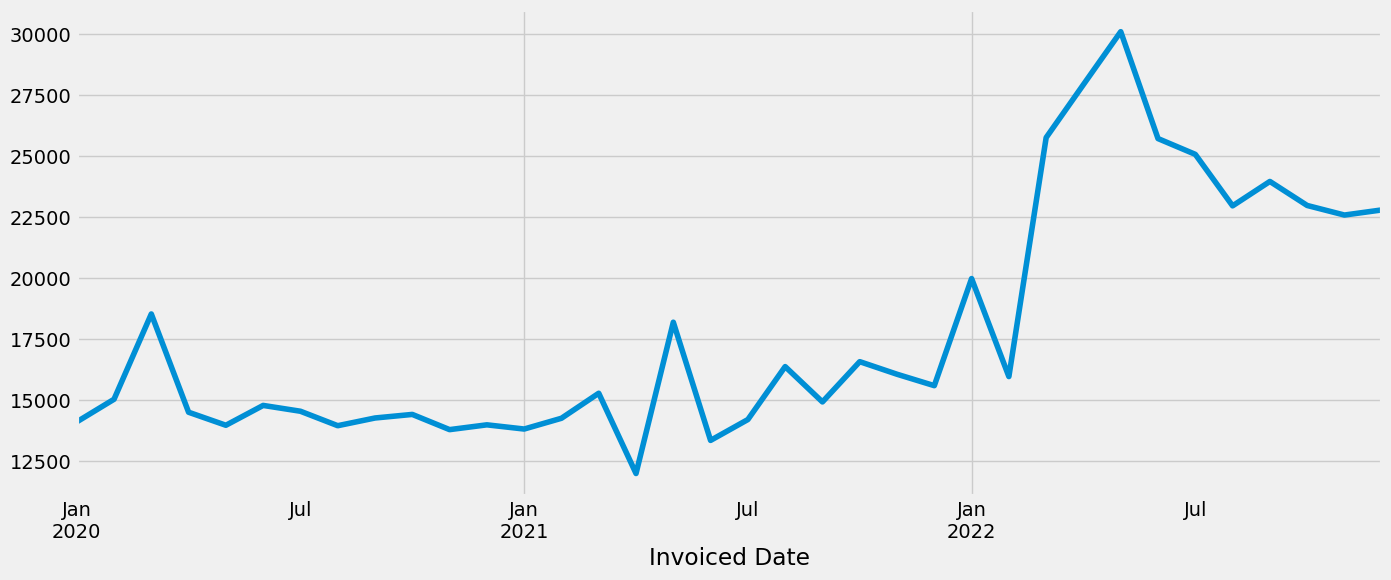

In [34]:
y.plot(figsize=(15, 6))
plt.show()

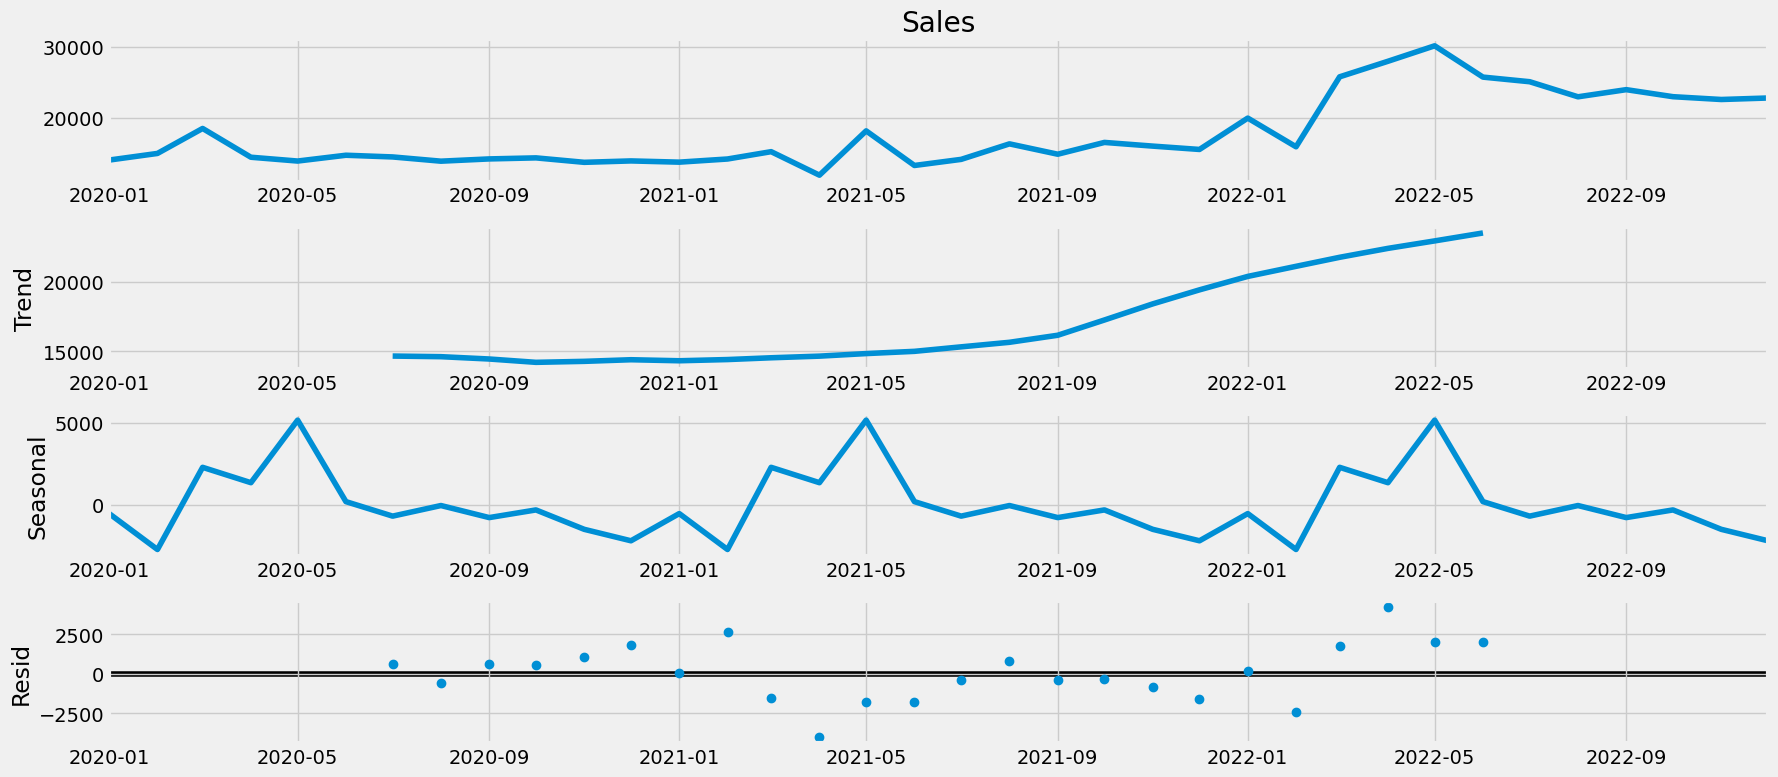

In [35]:
#Visualizing Sayerlack sales Time Series Data
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [37]:
#Time Series forecasting with ARIMA
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [50]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:789.4829858489111
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:512.0645487127126
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:474.68592531660005
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:237.21708861265165
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:482.77916999665086
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:448.3340832948863
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:257.76851325170486
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:220.3781553916961
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:746.9356508521639
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:484.87804643897397
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:445.44374567475677
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:210.042321006904
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:476.88217690074464
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:422.28811326017274
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:248.55075008810041
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:191.71443325115467
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:640.11402792631
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:423.22142083748156
AR

In [54]:
#Fitting the ARIMA Model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2125      0.148     -1.436      0.151      -0.502       0.077
ma.S.L12      -0.8544      0.306     -2.788      0.005      -1.455      -0.254
sigma2      7.302e+06   4.84e-08   1.51e+14      0.000     7.3e+06     7.3e+06


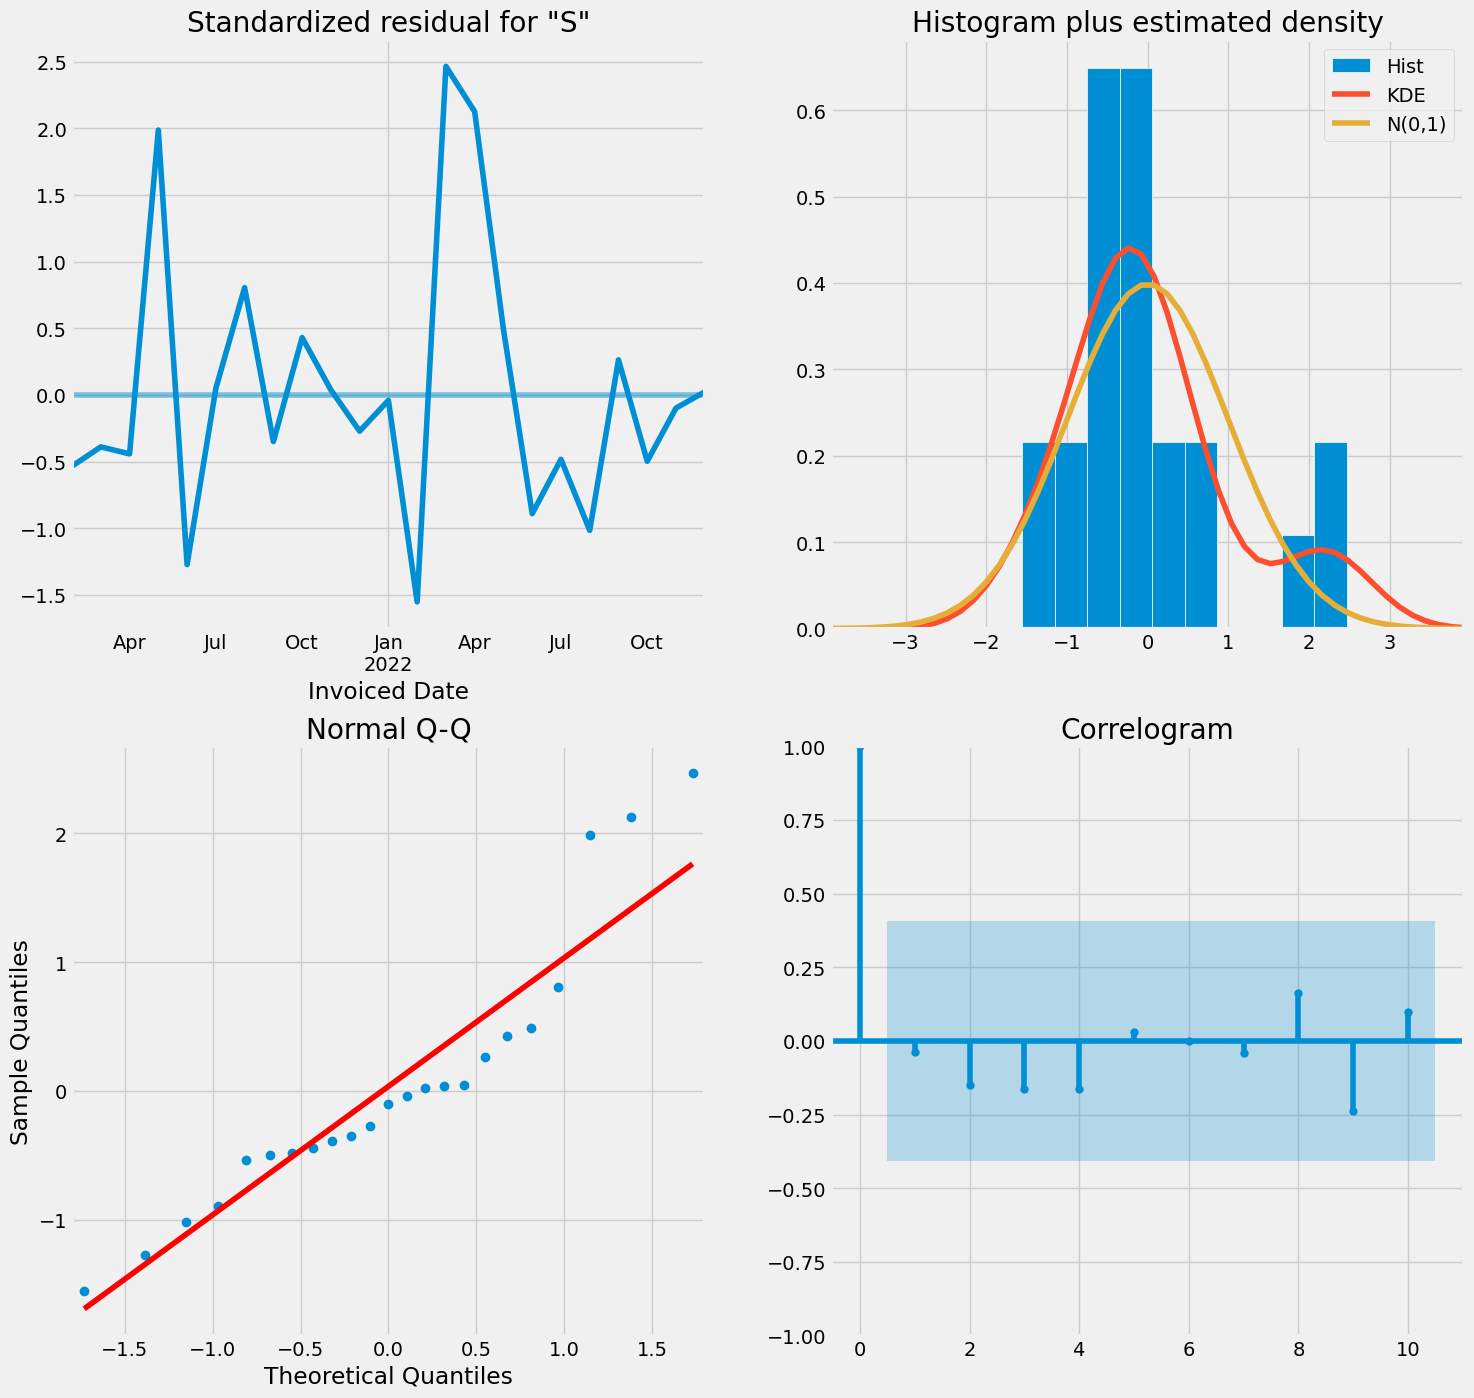

In [61]:
results.plot_diagnostics(figsize=(16, 16))
plt.show()

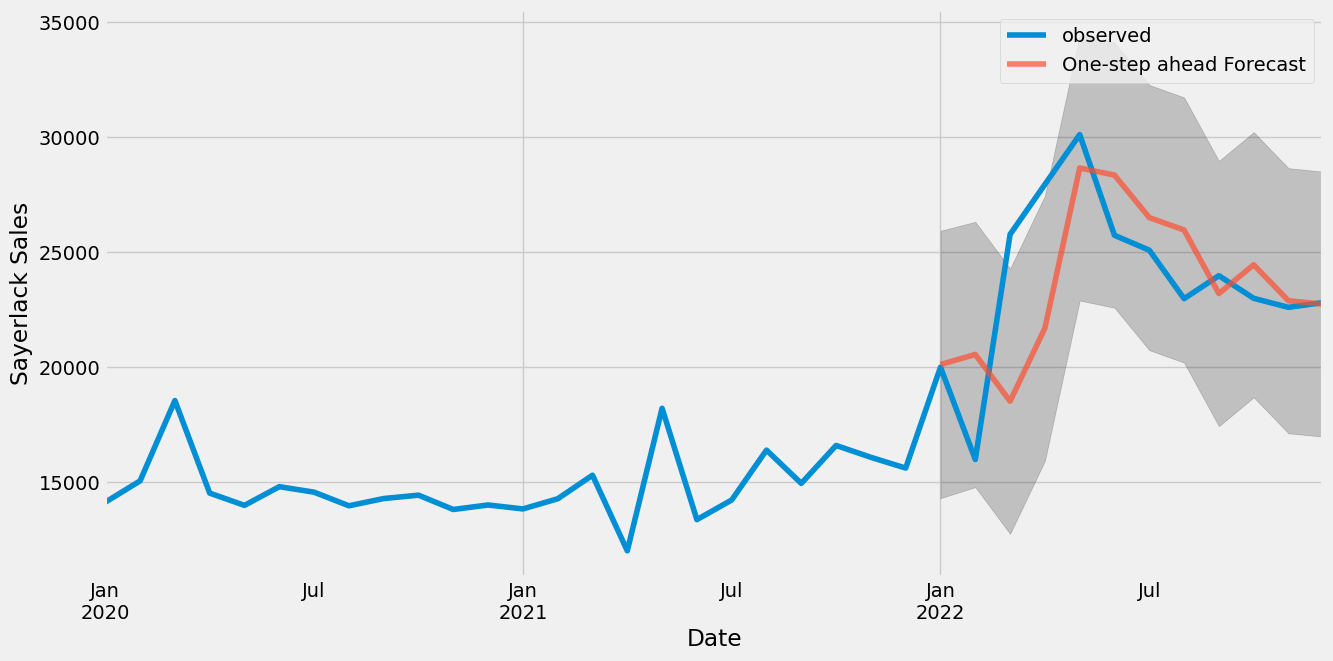

In [65]:
#Validating Forecasting
pred = results.get_prediction(start = pd.to_datetime('2022-01-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Sayerlack Sales')
plt.legend()
plt.show()


In [67]:
y_forecasted = pred.predicted_mean
y_truth = y['2022-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 11277086.71
The Root Mean Squared Error of our forecasts is 3358.14


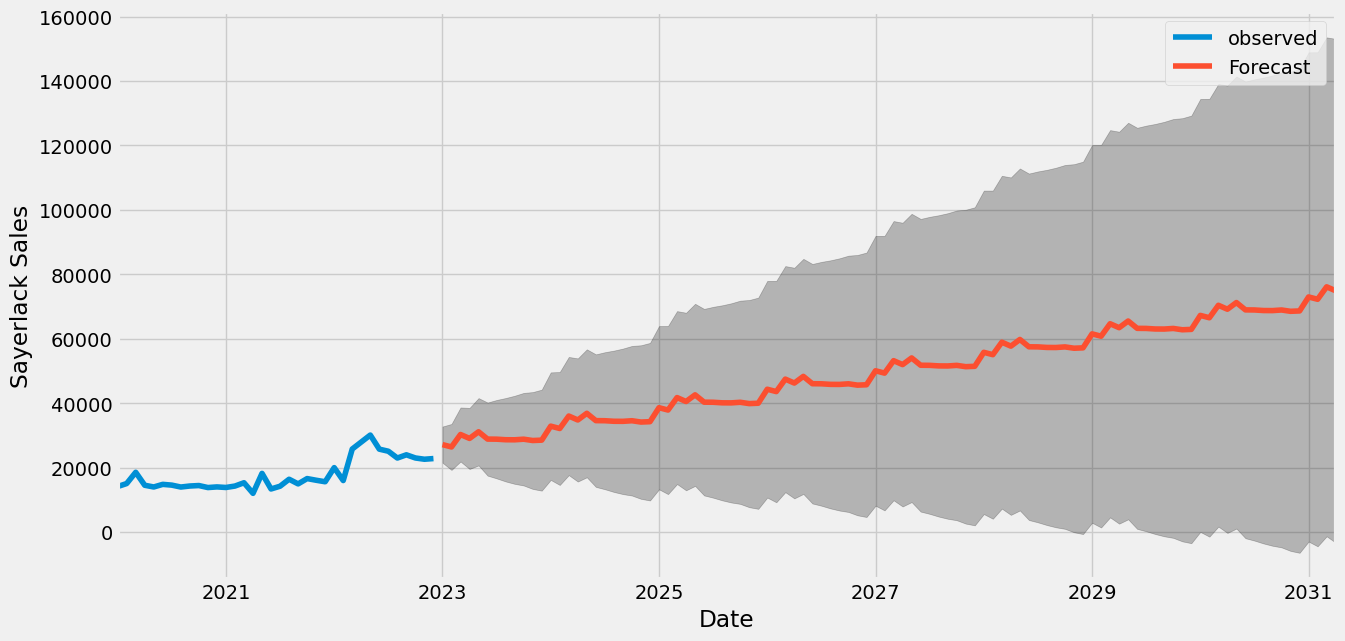

In [68]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Sayerlack Sales')
plt.legend()
plt.show()